<a href="https://colab.research.google.com/github/Hion-cy/ClassFiles/blob/main/AL263158_Tarea_20_Ejercicios_de_Normalizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica #20: Ejercicios de normalización
**Matricula** AL263158

Programación para analítica descriptiva y predictiva

# Ejercicio 1: Normalización Min-Max

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, alcohol).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Min-Max a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:
1. **¿Cómo afectó la normalización Min-Max a la distribución de los datos?**
*La distribucion de los datos no se ve afectado puesto que solo se ve afectada la escala de los mismos. De originalmente estar distribuidos entre 1.28 a 13, pasan a estarlo entre 0 y 1 (0.99999) proporcionalmente.*
2. **¿Qué interpretas del p-valor antes y después de la normalización?**
*El valor de pvalue sigue siendo practicamente igual antes y despues de la normalizacion. En ambas circunstancias esta alejado del 0.05 que podria considerarse normal, por lo que en este sistema no representa una mejora el aplicar este tipo de normalizacion y se anula la hipotesis de que son datos en distribucion "Normal".*


Valor minimo del color intensity
1.28
Valor maximo del color intensity
13.0
Analisis shapiro de "Color intensity"
statistic:  0.9403184358731959
pvalue:  9.22920982432373e-07
Analisis shapiro de "Color intensity" despues de normalizado Min-Max
Valor minimo:
0.0
Valor maximo:
0.9999999999999999
statistic:  0.9403184358731962
pvalue:  9.229209824324261e-07


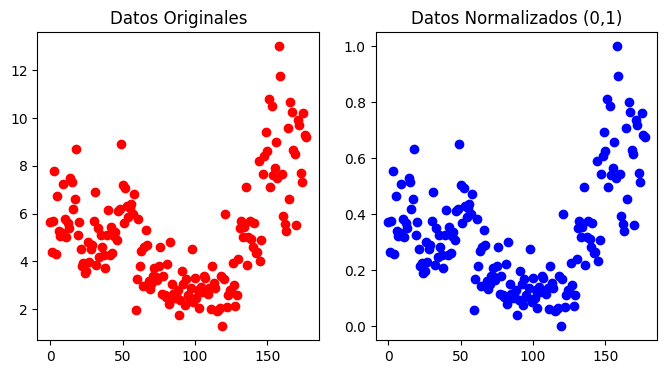

In [ ]:
from sklearn.datasets import load_wine
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df=load_wine()
df=pd.DataFrame(df.data,columns=df.feature_names)
#print(df.dtypes)
#print(df.head())
print("Valor minimo del color intensity")
print(df['color_intensity'].min())
print("Valor maximo del color intensity")
print(df['color_intensity'].max())


c_numerica=df[['color_intensity']]
#print(c_numerica.head())
statistic, pvalue = shapiro(df['color_intensity'])
print("Analisis shapiro de \"Color intensity\"")
print("statistic: ",statistic)
print("pvalue: ",pvalue)

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(c_numerica)

statistic, pvalue = shapiro(X_scaled)
print("Analisis shapiro de \"Color intensity\" despues de normalizado Min-Max")
print("Valor minimo:")
print(X_scaled.min())
print("Valor maximo:")
print(X_scaled.max())
print("statistic: ",statistic)
print("pvalue: ",pvalue)


plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(c_numerica)), c_numerica, color='red', label="Original")
plt.title("Datos Originales")

plt.subplot(1, 2, 2)
plt.scatter(range(len(X_scaled)), X_scaled, color='blue', label="Min-Max Scaling")
plt.title("Datos Normalizados (0,1)")

plt.show()

# Ejercicio 2: Normalización Z-Score

Instrucciones:

1.	Cargar el dataset wine de sklearn.
2.	Seleccionar una de las características numéricas (por ejemplo, malic_acid).
3.	Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4.	Aplicar la normalización Z-Score a los datos seleccionados.
5.	Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6.	Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.
7.	Responder las preguntas siguientes.

Preguntas:

1.	**¿Qué diferencia observas entre la distribución original y la normalizada con Z-Score?**
*Unicamente la escala se ve afectada, la distribucion tiene la misma forma.*
2.	**¿Qué implicaciones tiene la normalización Z-Score en el análisis de los datos?**
*La diferencia entre statistic original (0.9839469382497583) y despues de la normalización (0.9839469382497581) es minima pero la segunda lo aleja ligeramente mas de 1, con el p-value original (0.0386827755407432) y despues de la normalización (0.03868277554074046), aunque en este caso lo acerca ligeramente mas al 0.05 no hay ningun cambio significativo en cuanta a la distribucion "anormal" de la categoria "Ash".*

Analisis shapiro de "Ash"
statistic:  0.9839469382497583
pvalue:  0.0386827755407432
Analisis shapiro de "Ash" despues de normalizado Z-Score
statistic:  0.9839469382497581
pvalue:  0.03868277554074046


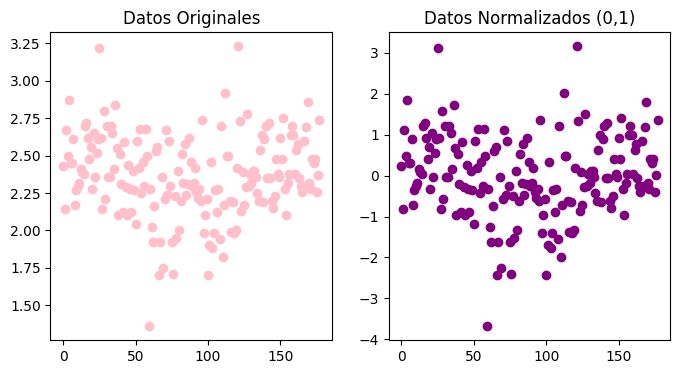

In [ ]:
from sklearn.datasets import load_wine
from scipy.stats import shapiro
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df=load_wine()
df=pd.DataFrame(df.data,columns=df.feature_names)
#print(df.dtypes)
#print(df.head())
df_ash=df[['ash']]
#print(df_ash.head())
statistic, pvalue = shapiro(df_ash)
print("Analisis shapiro de \"Ash\"")
print("statistic: ",statistic)
print("pvalue: ",pvalue)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(df_ash)

statistic2, pvalue2 = shapiro(X_standardized)
print("Analisis shapiro de \"Ash\" despues de normalizado Z-Score")
print("statistic: ",statistic2)
print("pvalue: ",pvalue2)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(df_ash)), df_ash, color='pink', label="Original")
plt.title("Datos Originales")

plt.subplot(1, 2, 2)
plt.scatter(range(len(X_standardized)), X_standardized, color='purple', label="Z-score Scaling")
plt.title("Datos Normalizados (0,1)")

plt.show()

# Ejercicio 3: Transformación Logarítmica
**Instrucciones:**

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación logarítmica (np.log) a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

1.	**¿Cómo afectó la transformación logarítmica a la distribución de los datos?**
*Afecta drasticamente la distribucion, transformando la curva del conjunto original a una linea mas "plana" dando una distribucion similar a una flecha.*
2.	**¿Qué interpretas del p-valor antes y después de la transformación logarítmica?**
*Los valores antes de la distribucion (statistic:  0.8163741830950924
pvalue:  8.140766392088353e-10) se encuentran muy alejados de lo que el test de shapiro acepta como "Normal" (1 y 0.05 respectivamente) sin embargo luego de aplicar la transformacion logaritmica es posible apreciar como statistic (0.9743527129281128) es muy cercano a 1, del mismo modo que pvalue (0.04802132607379543) se acerca a 0.05 que si bien no es una distribucion completamente normal de acuerdo a la prueba, significa que se acerca significativamente a ella.*


Analisis shapiro de "y"
statistic:  0.8163741830950924
pvalue:  8.140766392088353e-10

Analisis shapiro de "y_log"
statistic:  nan
pvalue:  nan
El resultado "nan" indica que intenta evaluar el log(y) para valores negativos lo cual no es posible

Se aplica la forma X = log_b (X+c)
Valor mínimo de y: -6.1530
Constante 'c' aplicada: 7.1530

Analisis shapiro de "y"
statistic:  0.8163741830950924
pvalue:  8.140766392088353e-10

Analisis shapiro de "y_log"
statistic:  0.9743527129281128
pvalue:  0.04802132607379543 



/tmp/ipython-input-3064294180.py:8: RuntimeWarning: invalid value encountered in log
  y_log = np.log(y)


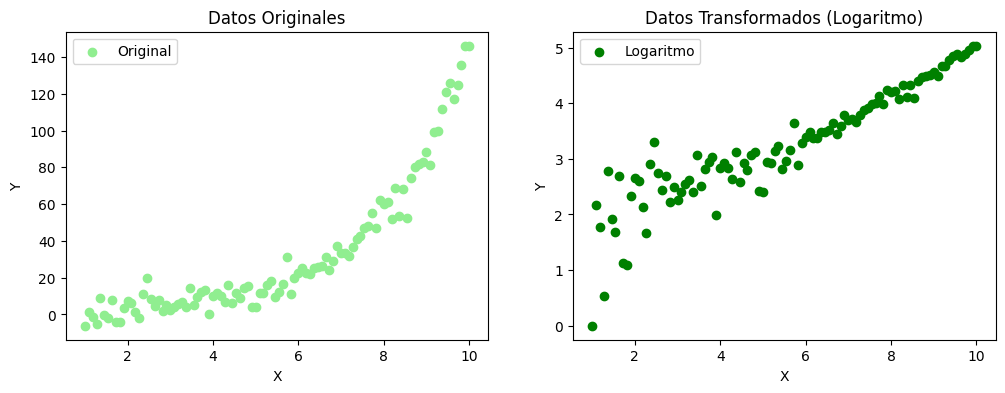

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

np.random.seed(50)
x = np.linspace(1, 10, 100)
y = np.exp(0.5 * x) + np.random.normal(scale=5, size=x.shape)
y_log = np.log(y)
print("Analisis shapiro de \"y\"")
statistic, pvalue = shapiro(y)
print("statistic: ",statistic)
print("pvalue: ",pvalue)
print("\nAnalisis shapiro de \"y_log\"")
statistic2, pvalue2 = shapiro(y_log)
print("statistic: ",statistic2)
print("pvalue: ",pvalue2)
print("El resultado \"nan\" indica que intenta evaluar el log(y) para valores negativos lo cual no es posible")


print("\nSe aplica la forma X = log_b (X+c)")
min_y = np.min(y)
c = 1 - min_y if min_y <= 0 else 0.0
# Aplicamos la transformación log(y + c)
y_log_corregida = np.log(y + c)
print(f"Valor mínimo de y: {min_y:.4f}")
print(f"Constante 'c' aplicada: {c:.4f}")


print("\nAnalisis shapiro de \"y\"")
statistic, pvalue = shapiro(y)
print("statistic: ",statistic)
print("pvalue: ",pvalue)

print("\nAnalisis shapiro de \"y_log\"")
statistic2, pvalue2 = shapiro(y_log_corregida)
print("statistic: ",statistic2)
print("pvalue: ",pvalue2,"\n")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='lightgreen', label="Original")
plt.title("Datos Originales")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x, y_log_corregida, color='green', label="Logaritmo")
plt.title("Datos Transformados (Logaritmo)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Ejercicio 4: Transformación Raíz Cuadrada
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar una transformación de raíz cuadrada a los datos.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

1.	**¿Cómo afectó la transformación raíz cuadrada a la distribución de los datos?**
*A partir de las graficas podemos ver como la grafica transformada (azul) es mas homogenea y con menos espacios entre columnas, lo que visualmente nos indica un cambio positivo en comparacion de los datos originales (grafica rosa). De acuerdo con los resultados del analisis anderson darling, podemos corroborar que los datos originales tienen un statistic (0.627945) menor que el 5% (0.692 ) lo que ya nos indica que la distribucion "Podria ser normal", despues de la transformacion el resultado es similar con un statistic (0.590163) menor al 5% (0.692) que si bien no es un cambio significativamente grande, sostiene la teoria de que los datos "pueden ser normales" para el valor critico delo 5%.*
2.	**¿Qué efectos tiene la raíz cuadrada sobre los valores extremos de los datos?**
*Los reduce considerablemente de [14,47] a [3.60555128 , 6.8556546 ]*

[35 41 15 41 13 20 26 47 33 14 43 15 31 20 25 42 18 15 25 38]
Analisis Anderson-Darling
statistic: 0.627945
Critical values:
0.506 15.0%
0.577 10.0%
0.692 5.0%
0.807 2.5%
0.960 1.0%


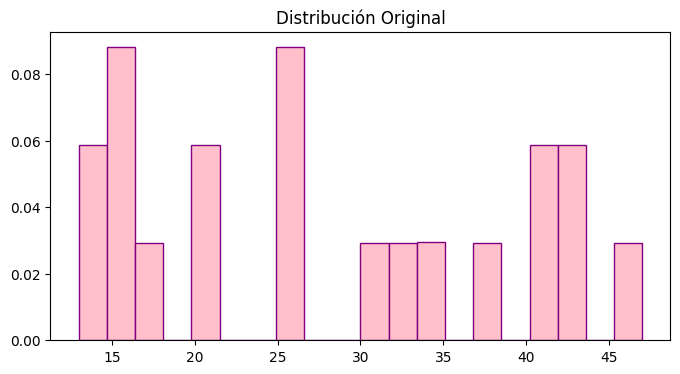



[5.91607978 6.40312424 3.87298335 6.40312424 3.60555128 4.47213595
 5.09901951 6.8556546  5.74456265 3.74165739 6.55743852 3.87298335
 5.56776436 4.47213595 5.         6.4807407  4.24264069 3.87298335
 5.         6.164414  ]

Analisis Anderson-Darling
statistic: 0.590163
Critical values:
0.506  15.0% 
0.577  10.0% 
0.692  5.0% 
0.807  2.5% 
0.960  1.0% 


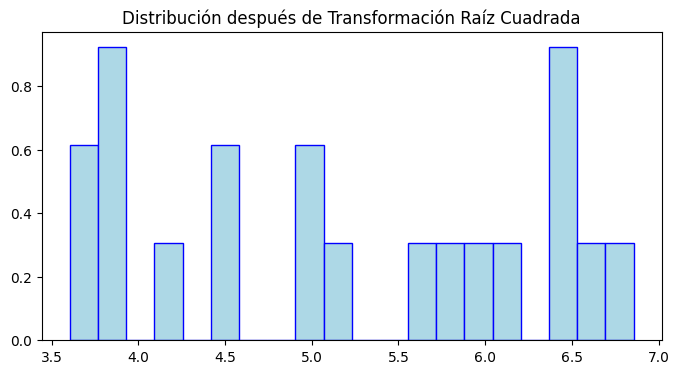

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import anderson

X1 = np.random.randint(low=10, high=50, size=20)
print(X1)
print("Analisis Anderson-Darling")
result = anderson(X1)
print('statistic: %f' % result.statistic)
print('Critical values:')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f'{cv:.3f} {sl:.1f}%')


plt.figure(figsize=(8, 4))
plt.hist(X1, bins=20, density=True, color='pink', edgecolor='purple')
plt.title("Distribución Original")
plt.show()

X_sqrt = np.sqrt(X1)
print("\n")
print(X_sqrt)
print("\nAnalisis Anderson-Darling")
result = anderson(X_sqrt)
print('statistic: %f' % result.statistic)
print('Critical values:')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f'{cv:.3f}  {sl:.1f}% ')

# Gráfico después de la transformación
plt.figure(figsize=(8, 4))
plt.hist(X_sqrt, bins=20, density=True, color='lightblue',edgecolor='blue')
plt.title("Distribución después de Transformación Raíz Cuadrada")
plt.show()

# Ejercicio 5: Transformación Box-Cox
Instrucciones:

1.	Cargar un conjunto de datos aleatorios generados con numpy.
2.	Aplicar la transformación Box-Cox a los datos utilizando scipy.stats.boxcox.
3.	Realizar una prueba de normalidad sobre los datos originales y transformados.
4.	Graficar los datos originales y transformados utilizando matplotlib.
5.	Responder las preguntas siguientes.

Preguntas:

1.	**¿Cómo afectó la transformación Box-Cox a la distribución de los datos?**

*En el primer histograma se puede observar como al utilizar valores exponenciales la distribucion se inclina mas hacia el 0 lo que no es muy util ya que lo que se busca es que se distribuyan de manera mas uniforme. Una vez aplicada la transformacion podemos ver como se forma la campana de una manera mas distribuida con valores mas grandes que comienzan desde -3 a 9 (aprox) y crean una grafica mas homogenea.*
2.**	¿Qué interpretación tiene el valor lambda obtenido en la transformación Box-Cox?**
*El valor λ=0.26 es el exponente óptimo que el algoritmo Box-Cox calculó para reducir el sesgo positivo de los datos. Este valor, al estar entre 0.5 (raíz cuadrada) y 0.0 (logaritmo), indica que se requirió una transformación fuerte para normalizar la distribución.*

*En esta transformación se observa un cambio en el valor estadistico  del análisis de Kosmogrov de 0.7911380170525157 a 0.6415874887454194 nos indica que aun no es una normalización completa pero nos encontramos cerca de ella.*



 Analisis Kolmogorov-Smirnov
statistic:  0.7911380170525157
pvalue:  0.0 



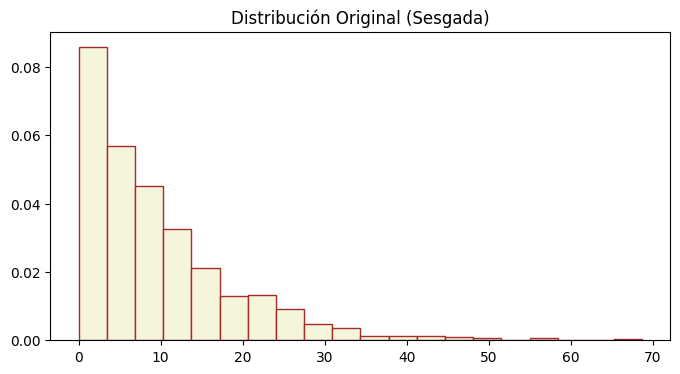

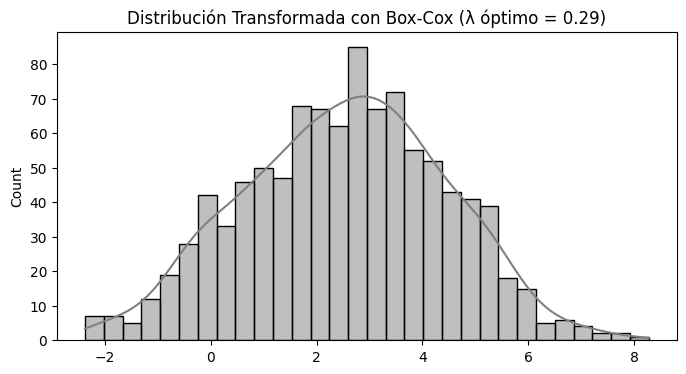


 Analisis Kolmogorov-Smirnov
statistic:  0.6415874887454194
pvalue:  0.0


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest
from scipy.stats import boxcox

X = np.random.exponential(scale=10, size=1000)
#print(x)


#normalidad de kosmogrov
statistic, pvalue = kstest(X, 'norm')
print("\n Analisis Kolmogorov-Smirnov")
print("statistic: ",statistic)
print("pvalue: ",pvalue,"\n")
# Gráfico de los datos originales
plt.figure(figsize=(8, 4))
plt.hist(X, bins=20, density=True, color='beige', edgecolor='brown')
plt.title("Distribución Original (Sesgada)")
plt.show()




X_transformed, lambda_opt = boxcox(X)

plt.figure(figsize=(8, 4))
sns.histplot(X_transformed, kde=True, bins=30, color='gray')
plt.title(f"Distribución Transformada con Box-Cox (λ óptimo = {lambda_opt:.2f})")
plt.show()

#normalidad de kosmogrov
statistic, pvalue = kstest(X_transformed, 'norm')
print("\n Analisis Kolmogorov-Smirnov")
print("statistic: ",statistic)
print("pvalue: ",pvalue)